# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 2. Loading the dataset

In [ ]:
data = pd.read_csv("Titanic-Dataset.csv")
df = pd.DataFrame(data=data)
df.head()

# 3. Exploratory Data Analysis

In [3]:
nul=df.isnull().sum()
nul[nul>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# 4. Types of missing values

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df1=df.copy()

In [8]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df1['Age']=df1['Age'].fillna(df1['Age'].median())

In [32]:
print(df1['Age'])
df1.isnull().sum()

AttributeError: 'numpy.float64' object has no attribute 'isnull'

In [11]:
df2=df.copy()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df2['Age']=df2['Age'].fillna(df2['Age'].mean())
print(df2['Age'])
df2.isnull().sum()

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df3=df.copy()
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df3['Age'] = df3['Age'].fillna(df3['Age'].mode()[0])
print(df3['Age'])
df3.isnull().sum()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df4=df.copy()
print(df4.head())
df4['Age']=df4['Age'].interpolate(methode='linear')
print(df4['Age'])
df4.isnull().sum()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
0 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df5=df.copy()
print(df5.head())
df5['Age']=df5['Age'].interpolate(method='polynomial', order=2)
print(df5['Age'])
df5.isnull().sum()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
0 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df6=df.copy()
print(df6.head())
imputer = KNNImputer(n_neighbors=5)
df6[['Age']] = imputer.fit_transform(df6[['Age']])
print(df6['Age'])
df6.isnull().sum()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
0 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df7=df.copy()
df7.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
imputer = IterativeImputer()
df7[['Age']] = imputer.fit_transform(df7[['Age']])
df7.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
from sklearn.metrics import mean_absolute_error

missing_indices = df['Age'].isnull()

df1 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df1.loc[missing_indices, 'Age'])
print(f"df1: {df1:.2f}")


df2 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df2.loc[missing_indices, 'Age'])
print(f"df2: {df2:.2f}")



df3 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df3.loc[missing_indices, 'Age'])
print(f"df3: {df3:.2f}")

df4 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df4.loc[missing_indices, 'Age'])
print(f"df4: {df4:.2f}")


df5 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df5.loc[missing_indices, 'Age'])
print(f"df5: {df5:.2f}")


df6 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df6.loc[missing_indices, 'Age'])
print(f"df6: {df6:.2f}")


df7 = mean_absolute_error(df.loc[missing_indices, 'Age'].fillna(0), df7.loc[missing_indices, 'Age'])
print(f"df7: {df7:.2f}")

df1: 28.00
df2: 29.70
df3: 24.00
df4: 29.83
df5: 30.64
df6: 29.70
df7: 29.70


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['Fare_log'] = np.log1p(df['Fare'])
df['Fare_log']

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare_log, Length: 891, dtype: float64

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
df['Fare_scaled']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare_scaled, Length: 891, dtype: float64

In [24]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

In [25]:
print(df.select_dtypes(include=['object']).columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [26]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Fare_log', 'Fare_scaled', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

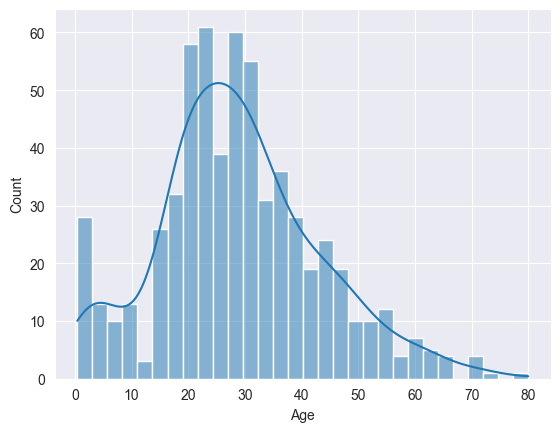

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

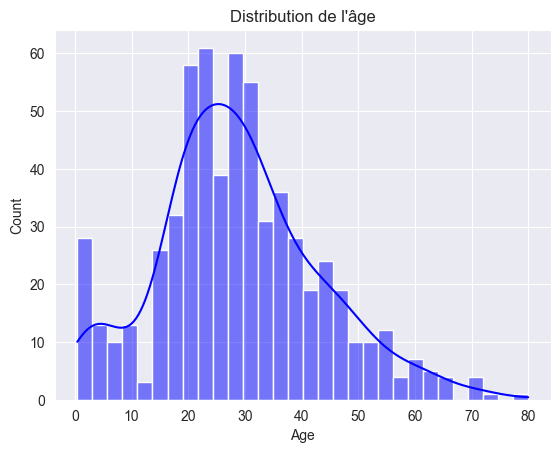

In [29]:
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Distribution de l'âge")
plt.show()

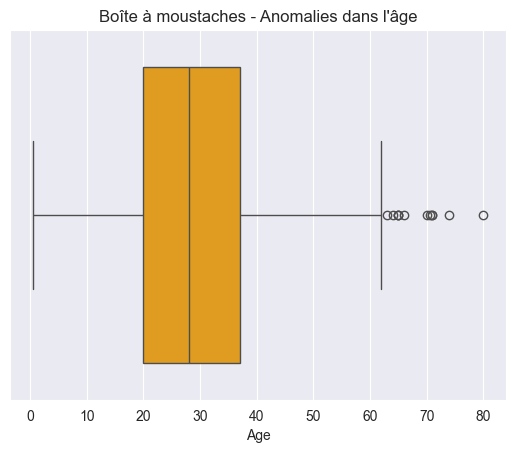

In [30]:
sns.boxplot(x=df['Age'], color='orange')
plt.title("Boîte à moustaches - Anomalies dans l'âge")
plt.show()

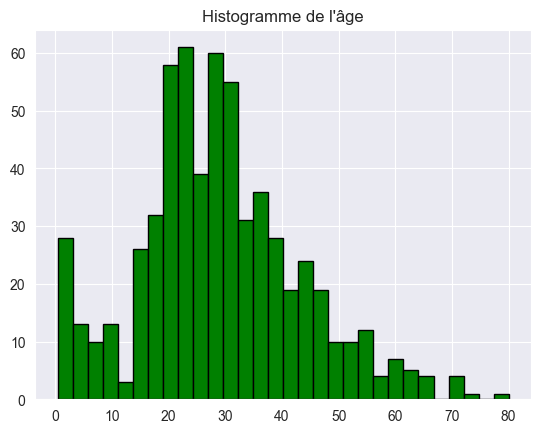

In [31]:
plt.hist(df['Age'], bins=30, color='green', edgecolor='black')
plt.title("Histogramme de l'âge")
plt.show()